In [1]:
from artefact_nca.dataset.voxel_dataset import VoxelDataset
from artefact_nca.model.voxel_ca_model import VoxelCAModel
from artefact_nca.trainer.voxel_ca_trainer import VoxelCATrainer

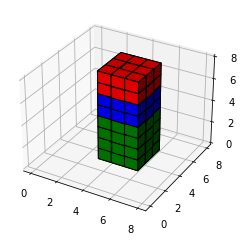

In [2]:

import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
import numpy as np


# prepare some coordinates
x, y, z = np.indices((8, 8, 8))

# draw cuboids in the top left and bottom right corners, and a link between them
cube1 = (x <= 5) & (x >= 3) & (y <= 5) & (y >= 3) & (z < 4)
cube2 = (x <= 5) & (x >= 3) & (y <= 5) & (y >= 3) & (z >= 4) & (z < 6)
cube3 = (x <= 5) & (x >= 3) & (y <= 5) & (y >= 3) & (z >= 6) & (z < 8) 

# link = abs(x - y) + abs(y - z) + abs(z - x) <= 2

# combine the objects into a single boolean array
voxels = cube1 | cube2 | cube3

# set the colors of each object
colors = np.empty(voxels.shape, dtype=object)
colors[cube3] = 'red'
colors[cube1] = 'green'
colors[cube2] = 'blue'

# and plot everything
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(colors, facecolors=colors, edgecolor='k')

plt.show()

In [3]:
from artefact_nca.utils.minecraft.voxel_utils import voxel_to_numeric

voxel, target_unique_val_dict = voxel_to_numeric(colors)

ct = VoxelCATrainer.from_config(
                    "custom_voxel.yaml",
                    config={
                        "dataset_config":{"target_voxel":voxel, "target_unique_val_dict":target_unique_val_dict},
                        "use_cuda":True
                    }
                )

/home/shyam/anaconda3/envs/py38/lib/python3.8/site-packages/hydra_core-1.1.0rc1-py3.8.egg/hydra/experimental/initialize.py:100: UserWarning: hydra.experimental.initialize_config_dir() is no longer experimental. Use hydra.initialize_config_dir().
  warnings.warn(
/home/shyam/anaconda3/envs/py38/lib/python3.8/site-packages/hydra_core-1.1.0rc1-py3.8.egg/hydra/experimental/compose.py:16: UserWarning: hydra.experimental.compose() is no longer experimental. Use hydra.compose()
  warnings.warn(


Before --- After


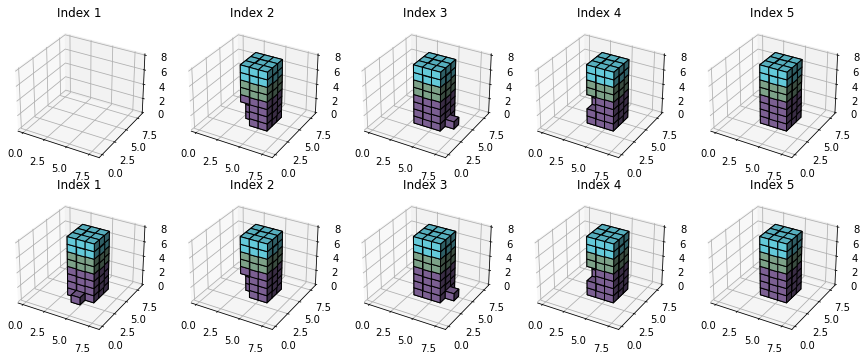

loss:0.017141936346888542--iou_loss:0.010989011265337467:   4%|▍         | 844/20000 [01:32<34:54,  9.15it/s]  


KeyboardInterrupt: 

In [4]:
ct.train()